In [1]:
from veldis.veldis import Veldis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from specim.specfuncs import spec1d

## This spectrum has been extracted from LRIS data and the 1d spectrum are coadded. The following are the part of the spectrum used to calculate velocity dispersion and are going to be reported.

## I have tested and it seems if we include Mg B line then the red side velocity dispersion values drop around 80-90 km/s which isn't physically possible. However if we exclude Mg B then red side velocity dispersion values rise up to around 140 km/s. And the full spectrum values increase a little bit. So I decided to exclude Mg B line. However, incluiding H-beta line though it's very close to A band. Red side fits also favor inclusion of H-beta line by being stable and rising upto around 155 km/s.

## The A band expands from around 7580 - 7700 Ang. And B-band expands from around 6860-6940 Ang.

In [2]:
spec = Veldis('../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[200, 3620])#[220, 3505]


Reading spectrum from ../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  5810.46
 Spectrum End:     8545.80
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5842.50
[Fe VII]      3761.40       5860.26
H-iota        3770.00       5873.66
H-theta       3797.00       5915.73
H-eta         3835.00       5974.93
CN bandhd     3883.00       6049.71
CaII K        3933.67       6128.66
CaII H        3968.47       6182.88
H-delta       4101.00       6389.36
G-band        4305.00       6707.19
H-gamma       4340.00       6761.72
Fe4383        4383.00       6828.71
Ca4455        4455.00       6940.89
Fe4531        4531.00       7059.30
H-beta        4861.00       7573.44
Mg I (b)      5176.00       8064.21



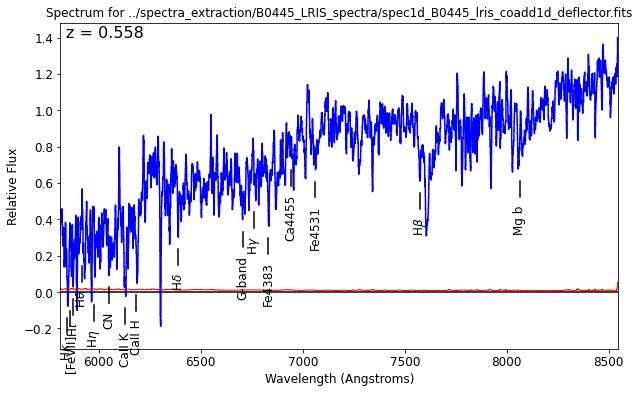

In [86]:
#%matplotlib notebook
fg = plt.figure(figsize=(10,6))
spec.smooth(7, fig=fg)
spec.mark_lines('abs', z=0.558, usesmooth=True)
#spec.mark_lines('strongem', z=0.558, usesmooth=True)

### We always need to rest frame the wavelength so that the measured line of sight velocity remains reasonable.


The wavelength is red shifted.
Velocity scale = 33.827000 km/s


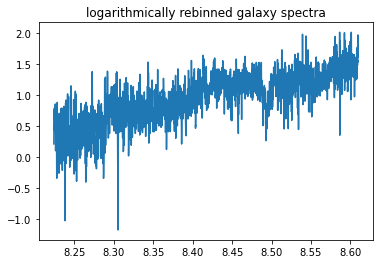

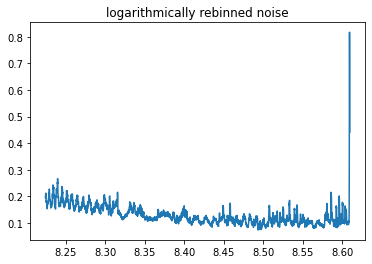

In [4]:
spec.cal_parm(z=0.558, high_z=True, logscale=False, veldis_start=200, noise_scale=0.12)

In [5]:
temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.6)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -22048.222261 

sigma_diff : 2.130182


## We masking only two atmospheric absorption lines, a sharp absorption type line near Ca K+H and another line near Ca4455.

In [78]:
mask_reg = np.log(np.array([(6295, 6311), (6850, 6890), (7016, 7035), (7540, 7723), (8000, 8210)])/1.558) #(6095, 6105)
mask_reg #(7581, 7723)

array([[8.304108  , 8.30664647],
       [8.38860098, 8.39442342],
       [8.41254559, 8.41525002],
       [8.48457451, 8.50855522],
       [8.54379387, 8.56970525]])


degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       197       175
chi2/DOF: 2.473; degree = 5; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       194       174
chi2/DOF: 2.473; degree = 6; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  21 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       194       174
chi2/DOF: 2.473; degree = 7; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  21 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       199       171
chi2/DOF: 2.462; degree = 8; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1268

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:       

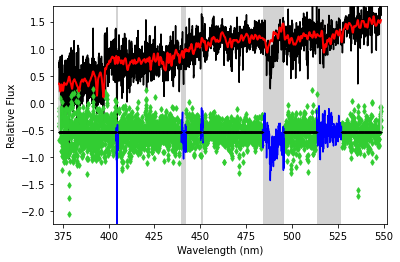

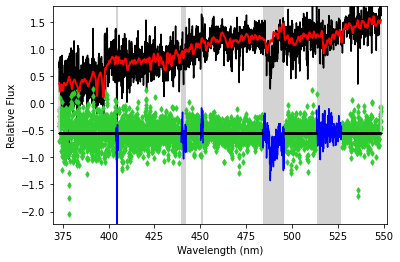

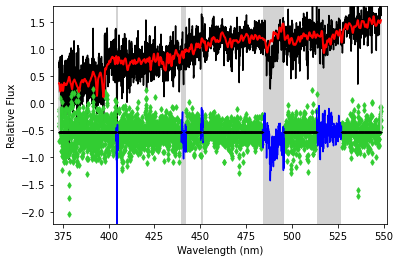

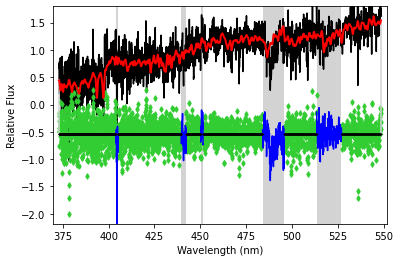

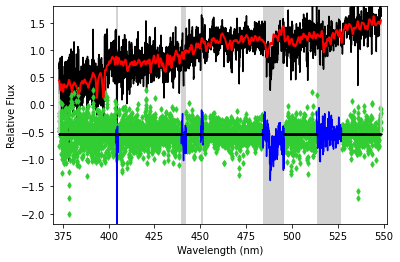

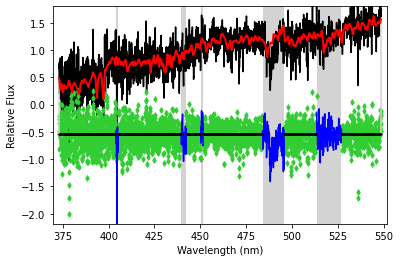

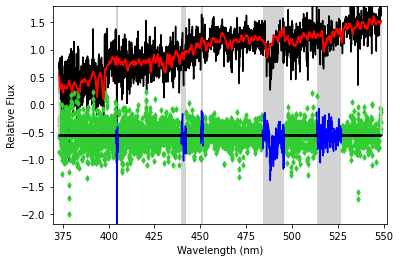

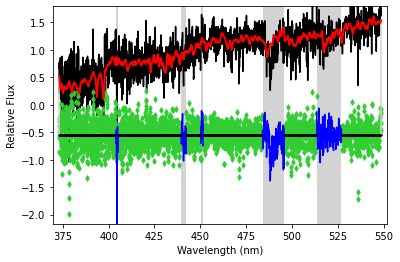

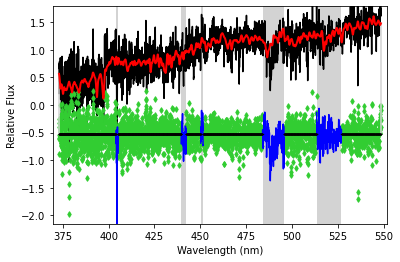

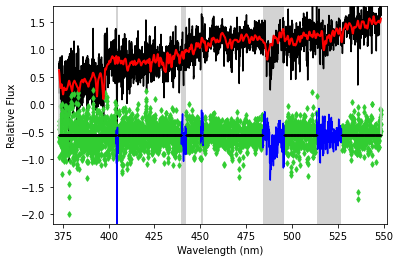

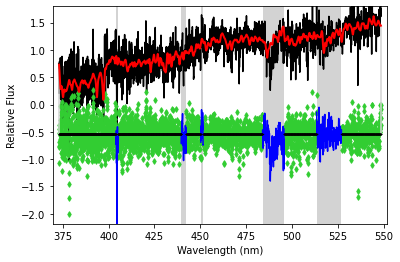

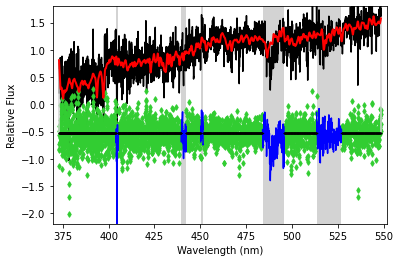

<Figure size 432x288 with 0 Axes>

In [79]:
# masking Mg-b and H-beta line both
spec.cal_veldis(temp_spec=temp_spec, degree=[5, 17], mask_reg=mask_reg, show_weight=True, moments=2)


degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       174       167
chi2/DOF: 2.465; degree = 5; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  26 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       174       167
chi2/DOF: 2.465; degree = 6; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  26 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       174       167
chi2/DOF: 2.465; degree = 7; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  25 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       174       169
chi2/DOF: 2.456; degree = 8; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  22 / 1268

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:       

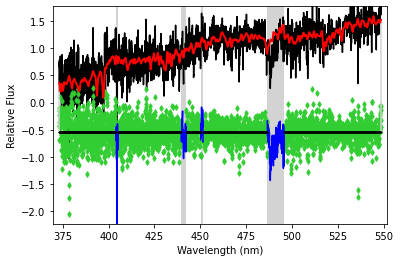

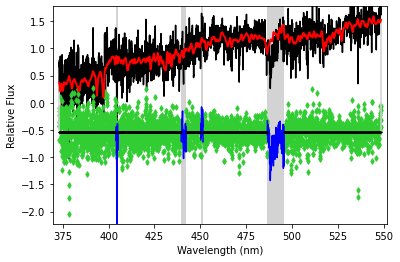

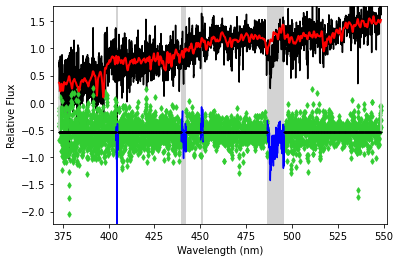

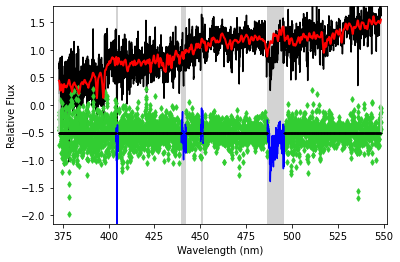

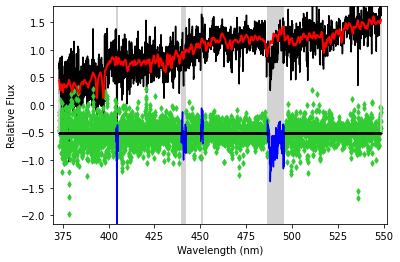

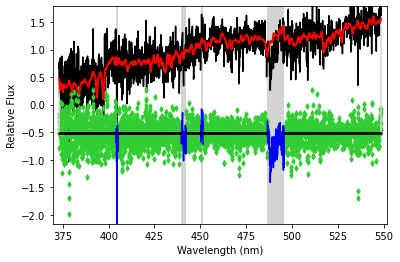

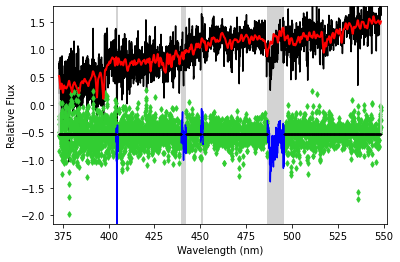

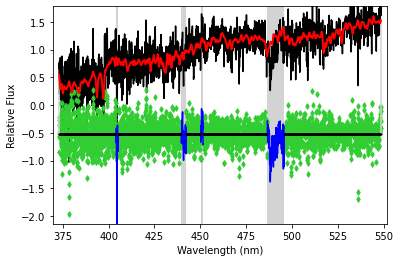

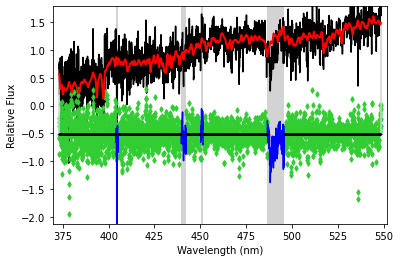

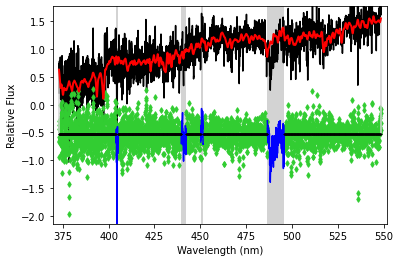

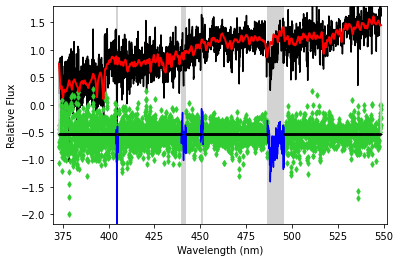

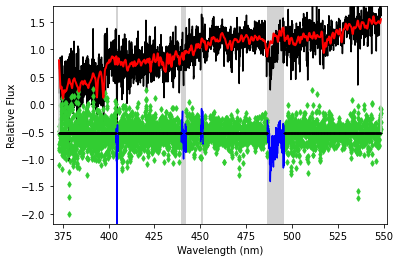

<Figure size 432x288 with 0 Axes>

In [7]:
# without masking Mg-B and H-beta
spec.cal_veldis(temp_spec=temp_spec, degree=[5, 17], mask_reg=mask_reg, show_weight=True, moments=2)

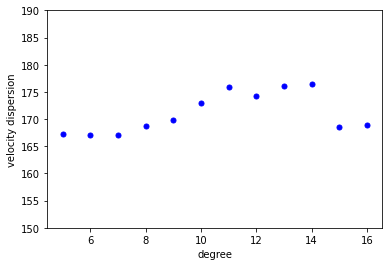

In [8]:
## current masked region
spec.plot_veldis(ylim=[150, 190])

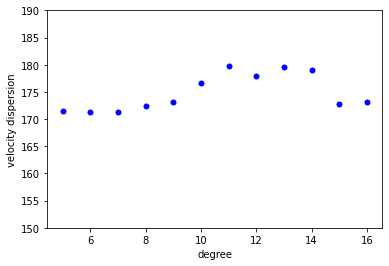

In [60]:
# without masking wavelength range (7016, 7035) and (6095, 6105)
spec.plot_veldis(ylim=[150, 190])

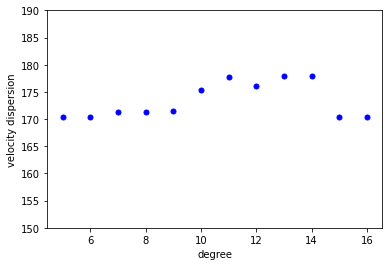

In [55]:
# current masked region plus wavelength range (6095, 6105) but without wavelength range (7016, 7035)
spec.plot_veldis(ylim=[150, 190])

order : 8


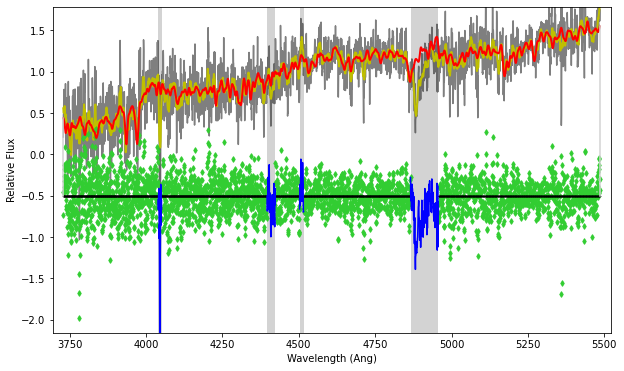

order : 13


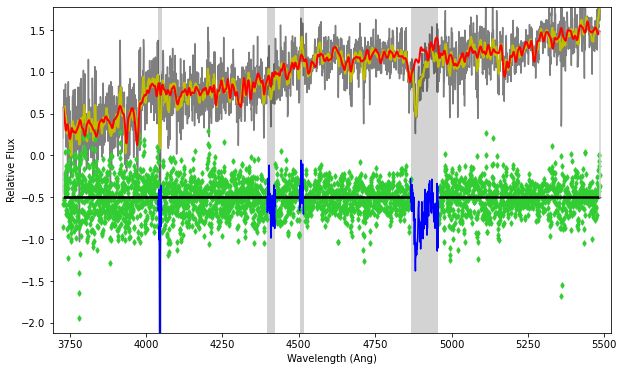

In [9]:
ord_list = np.array([8, 13])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

## Blue side

In [14]:
spec_b = Veldis('../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[200, 1875])


Reading spectrum from ../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  5810.46
 Spectrum End:     7149.93
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5842.50
[Fe VII]      3761.40       5860.26
H-iota        3770.00       5873.66
H-theta       3797.00       5915.73
H-eta         3835.00       5974.93
CN bandhd     3883.00       6049.71
CaII K        3933.67       6128.66
CaII H        3968.47       6182.88
H-delta       4101.00       6389.36
G-band        4305.00       6707.19
H-gamma       4340.00       6761.72
Fe4383        4383.00       6828.71
Ca4455        4455.00       6940.89
Fe4531        4531.00       7059.30



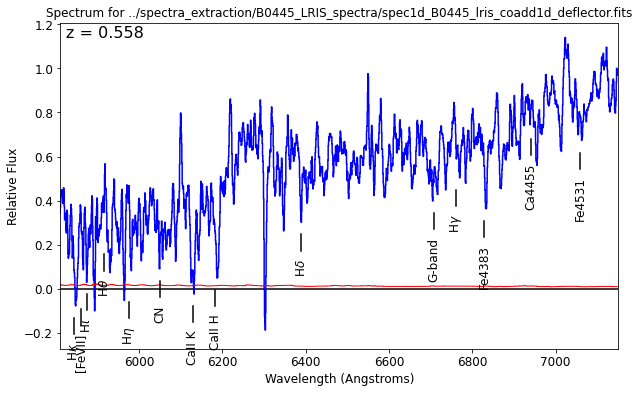

In [15]:
#%matplotlib notebook
fg = plt.figure(figsize=(10,6))
spec_b.smooth(7, fig=fg)
spec_b.mark_lines('abs', z=0.558, usesmooth=True)
#spec.mark_lines('strongem', z=0.558, usesmooth=True)


The wavelength is red shifted.
Velocity scale = 37.150342 km/s


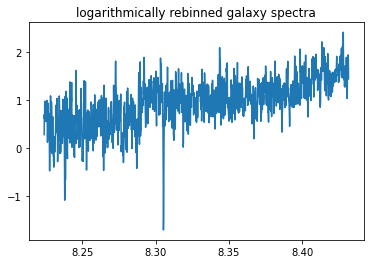

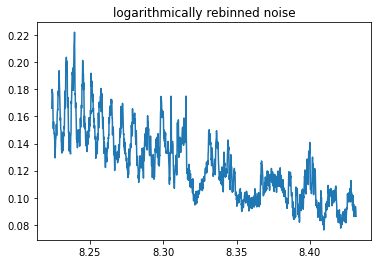

In [16]:
spec_b.cal_parm(z=0.558, high_z=True, logscale=False, veldis_start=200, noise_scale=0.12)

In [29]:
temp_spec_b = spec_b.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.6)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -22048.222261 

sigma_diff : 2.130182


In [ ]:
mask_reg_b = np.log(np.array([(6295, 6311), (6850, 6890), (7016, 7035), (7581, 7723)])/1.558) #(6095, 6105)
mask_reg_b


degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       184       197
chi2/DOF: 5.899; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       185       198
chi2/DOF: 5.894; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       187       214
chi2/DOF: 5.882; degree = 7; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       187       213
chi2/DOF: 5.882; degree = 8; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1268

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:       

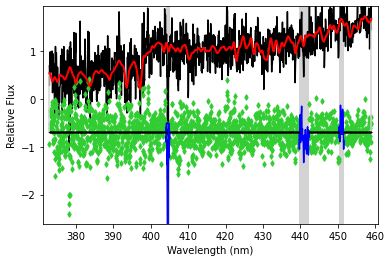

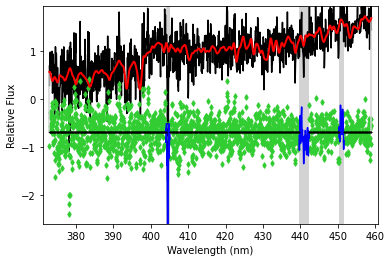

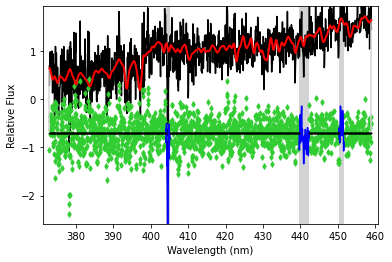

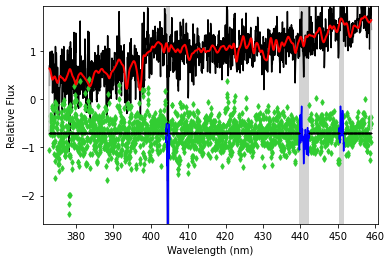

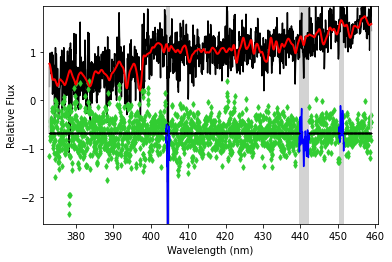

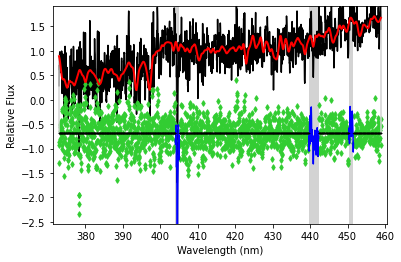

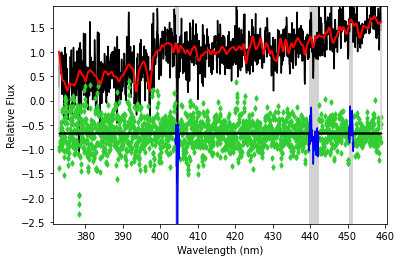

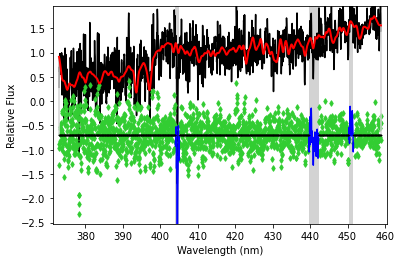

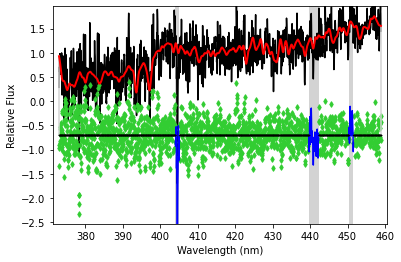

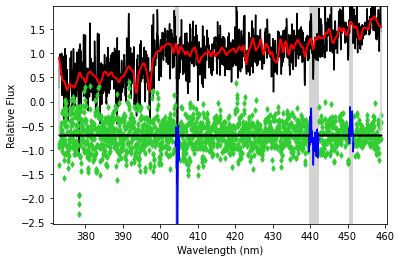

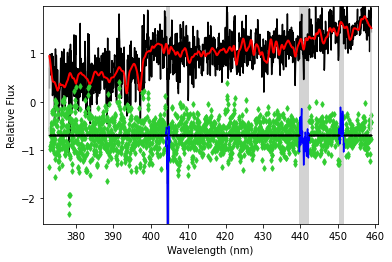

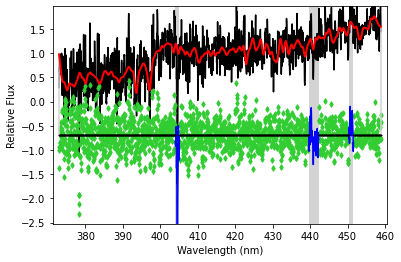

<Figure size 432x288 with 0 Axes>

In [30]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[5, 17], mask_reg=mask_reg, show_weight=True, moments=2)

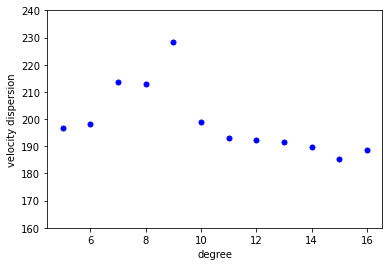

In [32]:
spec_b.plot_veldis(ylim=[160, 240])

order : 8


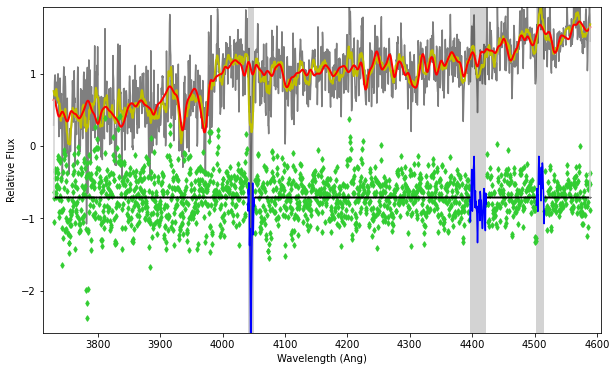

order : 10


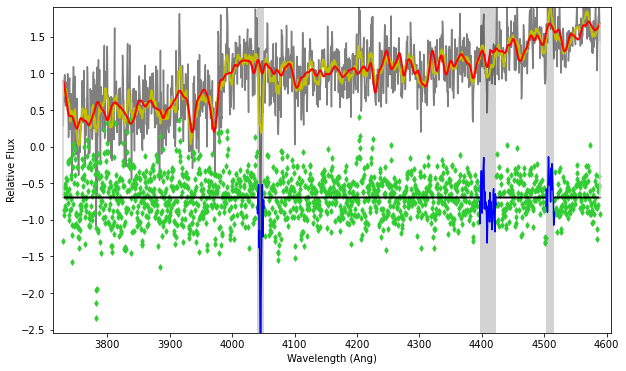

order : 14


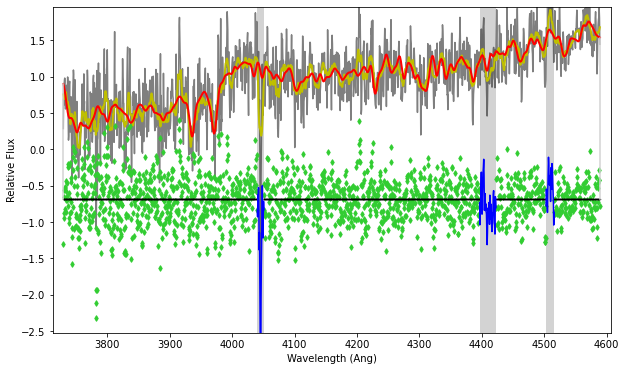

In [33]:
ord_list = np.array([8, 10, 14])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_b.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

## Red side

In [60]:
spec_r = Veldis('../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[1270, 3200])#[1876, 3620]


Reading spectrum from ../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  6666.62
 Spectrum End:     8209.80
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
G-band        4305.00       6707.19
H-gamma       4340.00       6761.72
Fe4383        4383.00       6828.71
Ca4455        4455.00       6940.89
Fe4531        4531.00       7059.30
H-beta        4861.00       7573.44
Mg I (b)      5176.00       8064.21



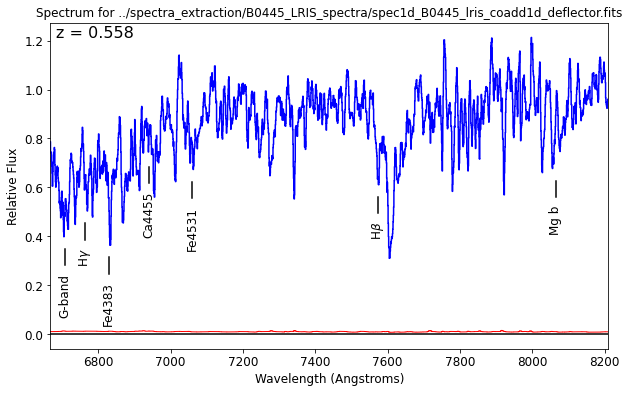

In [61]:
#%matplotlib notebook
fg = plt.figure(figsize=(10,6))
spec_r.smooth(7, fig=fg)
spec_r.mark_lines('abs', z=0.558, usesmooth=True)
#spec.mark_lines('strongem', z=0.558, usesmooth=True)


The wavelength is red shifted.
Velocity scale = 32.359646 km/s


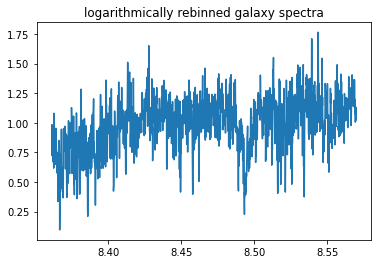

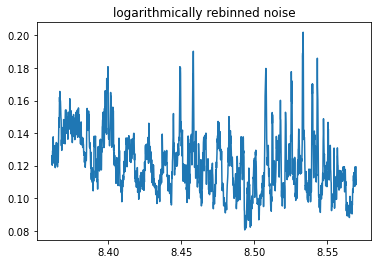

In [62]:
spec_r.cal_parm(z=0.558, high_z=True, logscale=False, veldis_start=200, noise_scale=0.12)


The wavelength is red shifted.
Velocity scale = 30.635308 km/s


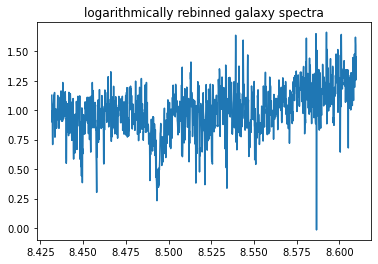

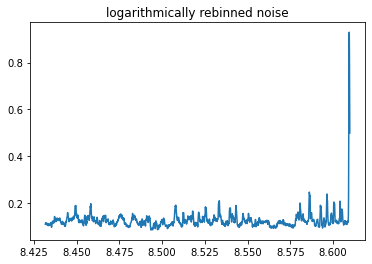

In [36]:
#spec_r.cal_parm(z=0.558, high_z=True, logscale=False, veldis_start=200, noise_scale=0.12)

In [63]:
temp_spec_r = spec_r.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.6)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -63255.372876 

sigma_diff : 2.130182


In [92]:
mask_reg_r = np.log(np.array([(6295, 6311), (6850, 6890), (7016, 7035), (7585, 7723), (8000, 8210)
                              ])/1.558) #(6095, 6105) (8000, 8210)
mask_reg_r

array([[8.304108  , 8.30664647],
       [8.38860098, 8.39442342],
       [8.41254559, 8.41525002],
       [8.49052494, 8.50855522],
       [8.54379387, 8.56970525]])


degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       180       162
chi2/DOF: 1.689; degree = 5; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 29; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       188       155
chi2/DOF: 1.684; degree = 6; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 23; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       189       154
chi2/DOF: 1.684; degree = 7; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 26; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       190       151
chi2/DOF: 1.683; degree = 8; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 26; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1268

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:       

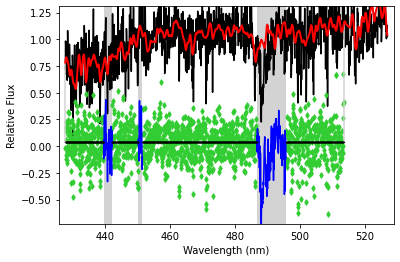

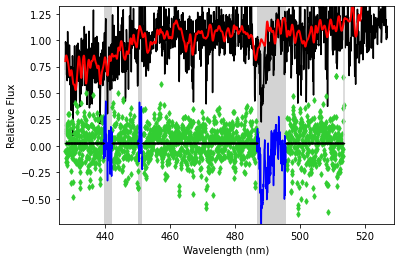

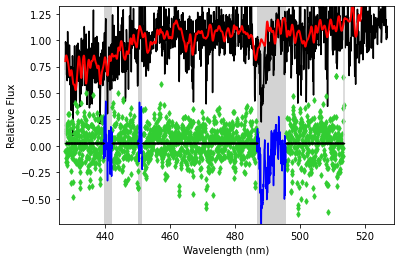

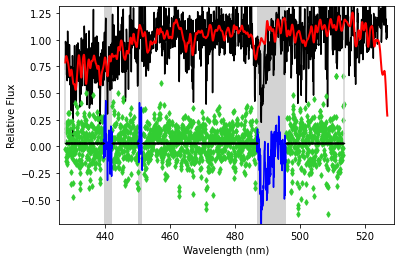

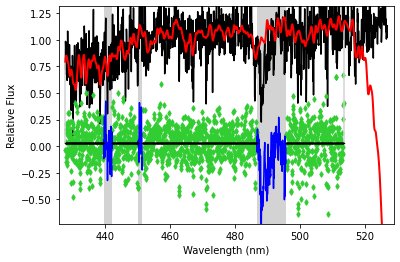

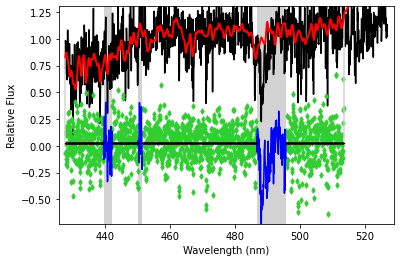

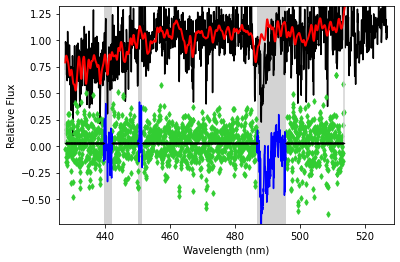

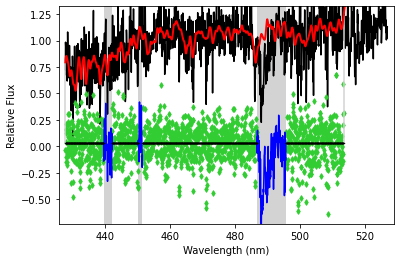

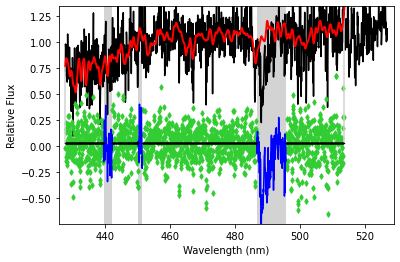

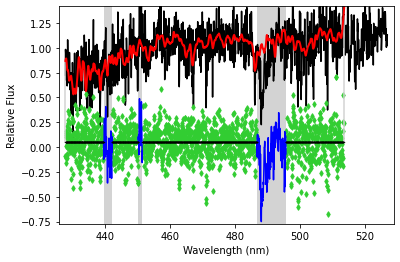

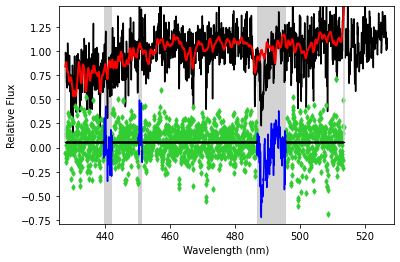

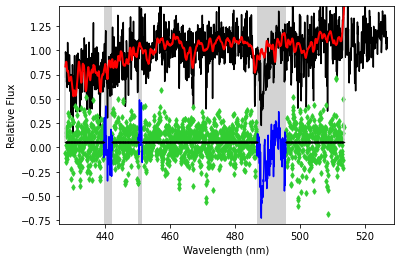

<Figure size 432x288 with 0 Axes>

In [93]:
# Masking Mg-b but inlucing H-beta line
spec_r.cal_veldis(temp_spec=temp_spec_r, degree=[5, 17], mask_reg=mask_reg_r, show_weight=True, moments=2)

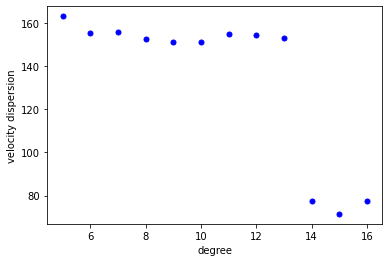

In [91]:
# masking Mg-B line and including H-beta 
spec_r.plot_veldis() #ylim=[50, 90]


degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       199       152
chi2/DOF: 1.691; degree = 5; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 29; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       203       148
chi2/DOF: 1.685; degree = 6; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 23; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       202       148
chi2/DOF: 1.685; degree = 7; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 23; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       203       144
chi2/DOF: 1.684; degree = 8; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 23; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1268

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:       

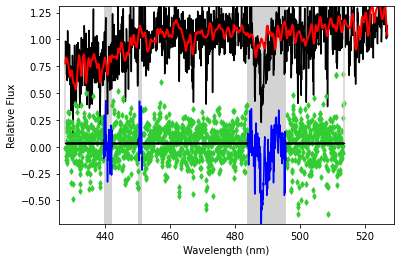

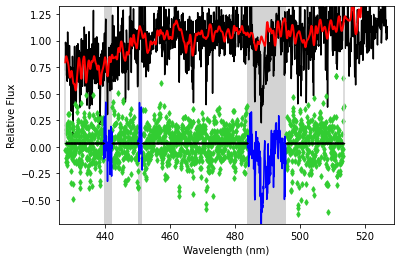

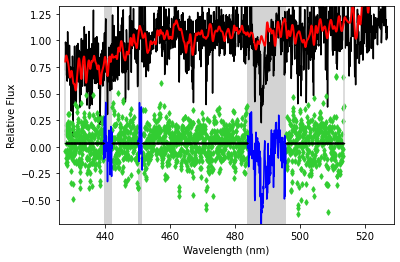

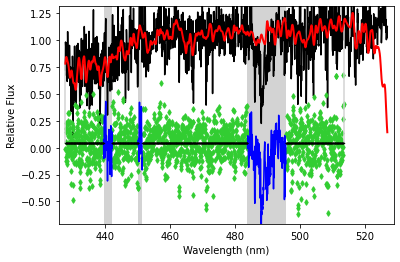

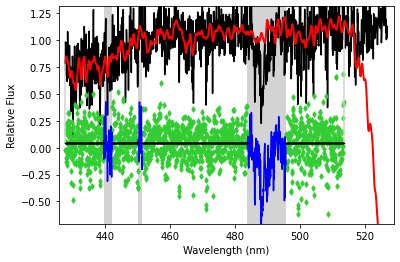

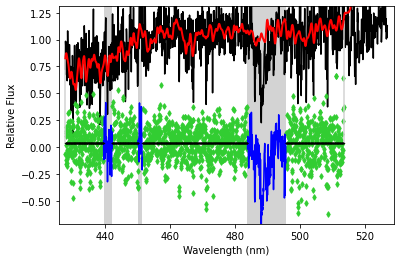

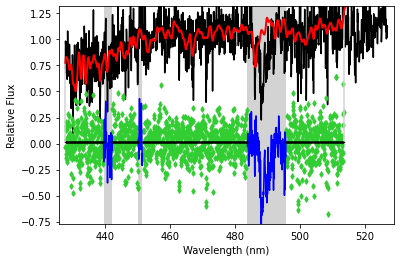

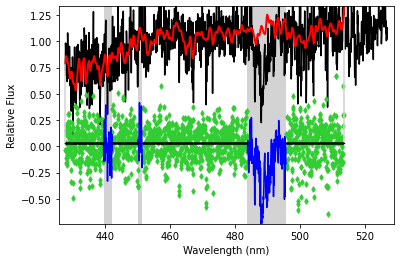

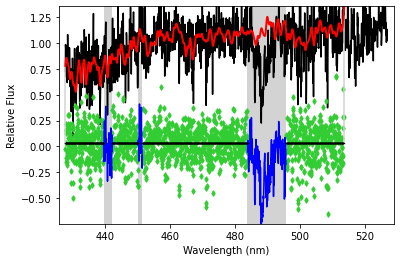

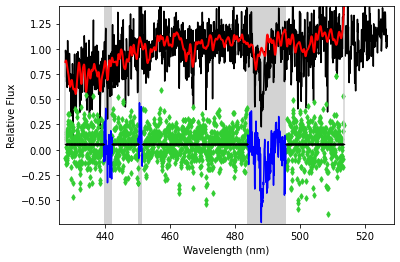

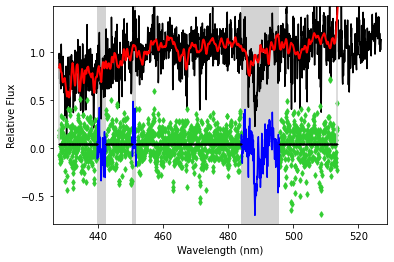

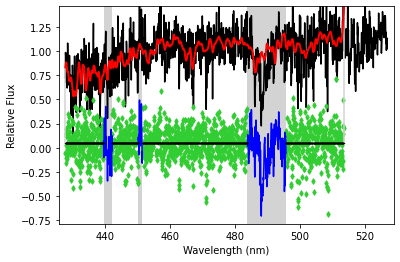

<Figure size 432x288 with 0 Axes>

In [77]:
# masking Mg-B and H-beta line
spec_r.cal_veldis(temp_spec=temp_spec_r, degree=[5, 17], mask_reg=mask_reg_r, show_weight=True, moments=2)

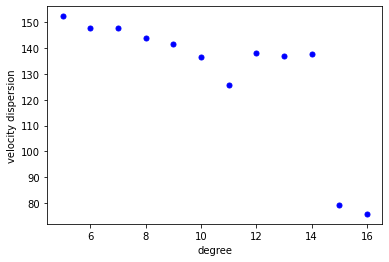

In [80]:
# masking Mg-b and H-beta line
spec_r.plot_veldis() #ylim=[50, 90]


degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       158       155
chi2/DOF: 1.690; degree = 5; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 23; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:        78        82
chi2/DOF: 1.680; degree = 6; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 20; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:        78        82
chi2/DOF: 1.680; degree = 7; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:        80        84
chi2/DOF: 1.680; degree = 8; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 20; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1268

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:       

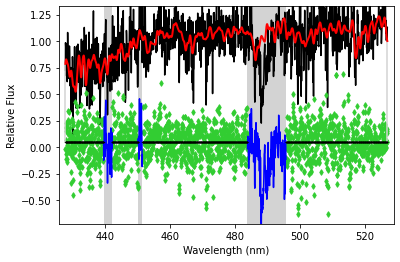

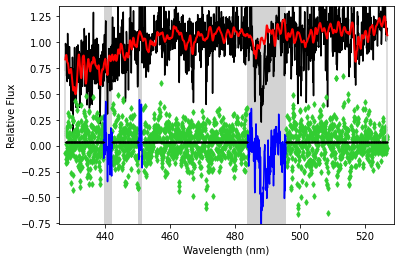

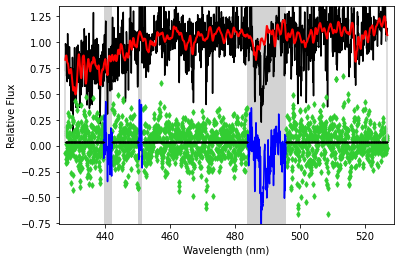

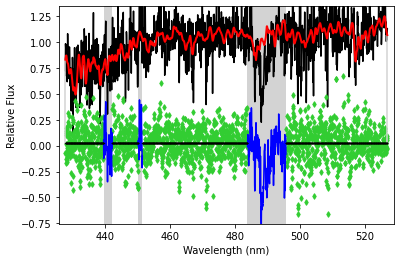

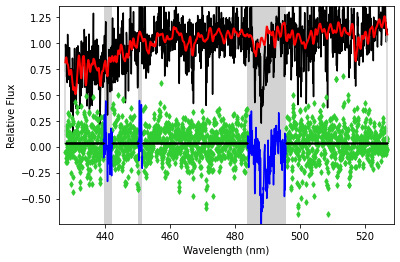

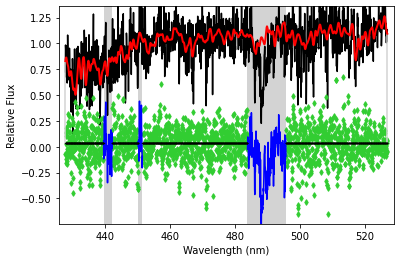

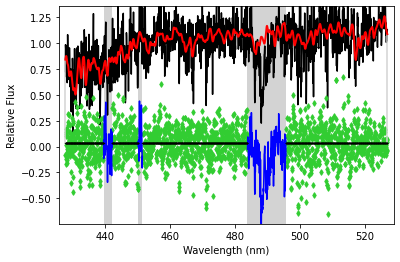

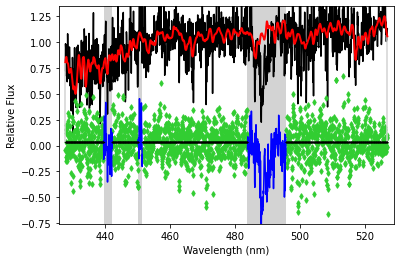

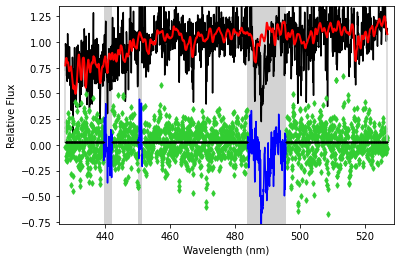

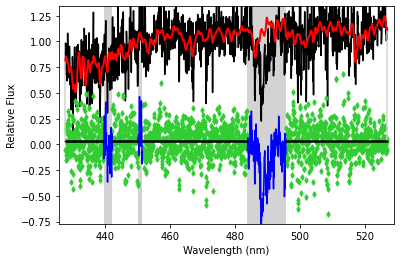

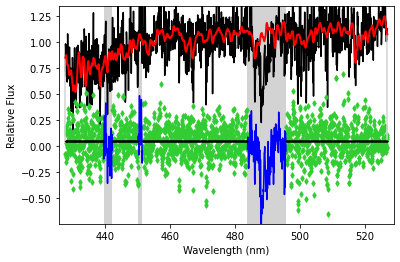

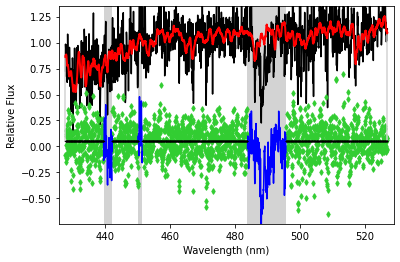

<Figure size 432x288 with 0 Axes>

In [82]:
spec_r.cal_veldis(temp_spec=temp_spec_r, degree=[5, 17], mask_reg=mask_reg_r, show_weight=True, moments=2)

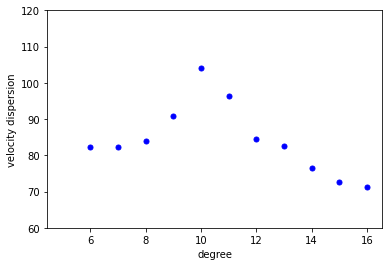

In [85]:
spec_r.plot_veldis(ylim=[60, 120]) #ylim=[50, 90]

order : 10


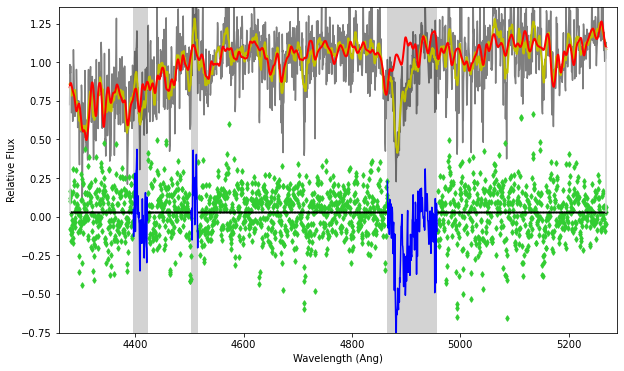

In [65]:
ord_list = np.array([10])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_r.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

## Collect the templates which has been used while fitting full spectrum

In [69]:
temp_used = []
for w in spec.temp_weight:
    temp_used.append(np.array(spec.templates)[w!=0])
temp_set =np.unique(np.hstack(temp_used))
#np.savetxt('templates_used_B0445.txt', temp_set, fmt='%s')

In [70]:
tem = np.loadtxt('templates_used_B0445.txt', dtype=str)
temp_set1 = np.unique(np.concatenate([temp_set, tem]))
np.savetxt('templates_used_B0445.txt', temp_set1, fmt='%s')

## The following is the value we are going to report. This value is calculated using all the templates, additive polynomial degree 10 and while fitting only for two moments.


degree : 10
 Best Fit:       Vel     sigma
 comp.  0:       176       173
chi2/DOF: 3.535; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  21 / 1271


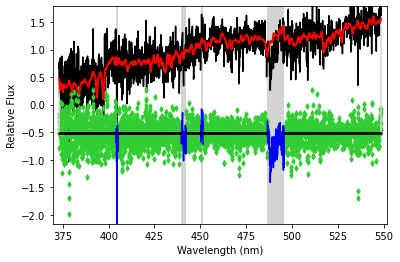

<Figure size 432x288 with 0 Axes>

In [71]:
spec.cal_veldis(temp_spec=temp_spec, degree=[10, 11], mask_reg=mask_reg, show_weight=True, moments=2)

order : 10


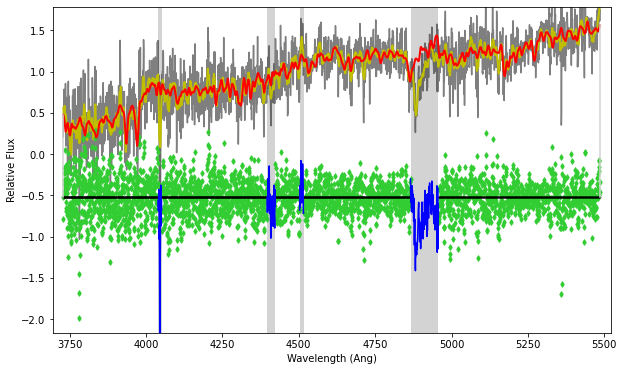

In [72]:
ord_list = np.array([10])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

## store best fit data and good pixel values for future use

In [104]:
gdpix = np.pad(spec.goodpixels[0], (0, len(spec.best_fit[0])- len(spec.goodpixels[0])))
np.savetxt('modelfit_B0445.txt', np.array([spec.best_fit[0], gdpix]), fmt='%f')

## Load text file and preapre to use

In [106]:
fit_data = np.loadtxt('modelfit_B0445.txt')

In [117]:
np.trim_zeros(fit_data[1], 'b').astype('int')
#spec.goodpixels[0]

array([   0,    1,    2, ..., 3417, 3418, 3419])

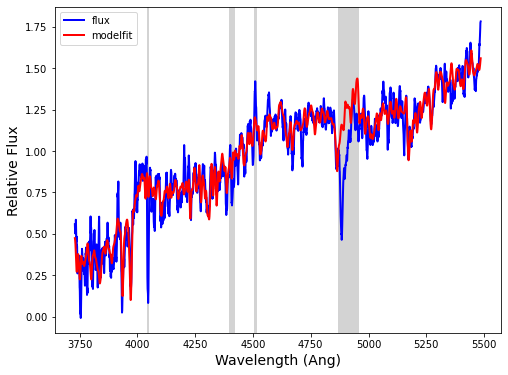

In [84]:
plt.figure(figsize=(8,6))
boxsize=15
x = np.exp(spec.wav_rebinned)
ll, rr = np.min(x), np.max(x)
gal_rebinn = spec1d.Spec1d(wav=x, flux=spec.flux_rebinned, verbose=False)
gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize, verbose=False)
bst = spec.best_fit[0]
goodpixels = spec.goodpixels[0]
plt.xlabel(r"Wavelength (Ang)", fontsize=14)
plt.ylabel("Relative Flux", fontsize=14)
plt.plot(x, gal_smooth, color='b', linewidth=2, label='flux')
plt.plot(x, bst, 'r', linewidth=2, label='modelfit')
w = np.flatnonzero(np.diff(goodpixels) > 1)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    plt.axvspan(x[a], x[b], facecolor='lightgray')
    #plt.plot(x[a : b + 1], resid[a : b + 1], 'b')
plt.legend()
#plt.text(8000, 0.6, r'$ \sigma^P=310 km s^{-1}$', fontsize=18)

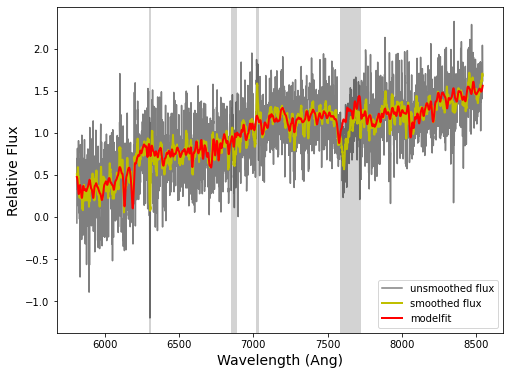

In [120]:
plt.figure(figsize=(8,6))
boxsize=15
x = np.exp(spec.wav_rebinned)*1.558
ll, rr = np.min(x), np.max(x)
gal_rebinn = spec1d.Spec1d(wav=x, flux=spec.flux_rebinned, verbose=False)
gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize, verbose=False)
bst = fit_data[0] #spec.best_fit[0]
goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')#spec.goodpixels[0]
plt.xlabel(r"Wavelength (Ang)", fontsize=14)
plt.ylabel("Relative Flux", fontsize=14)
plt.plot(x, gal_rebinn['flux'], color='k', label='unsmoothed flux', alpha=0.5)
plt.plot(x, gal_smooth, color='y', linewidth=2, label='smoothed flux')
plt.plot(x, bst, 'r', linewidth=2, label='modelfit')
w = np.flatnonzero(np.diff(goodpixels) > 1)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    plt.axvspan(x[a], x[b], facecolor='lightgray')
    #plt.plot(x[a : b + 1], resid[a : b + 1], 'b')
plt.legend()

## Calculate SNR of the spectrum including masked region and also excluding masked region

SNR : 30.575724


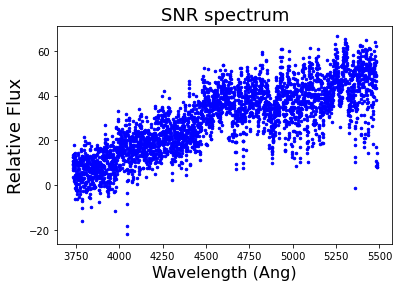

30.575723884709895

In [67]:
# including masked region
spec.cal_SNR(full_spec=True, doplot=True)

SNR : 29.767574


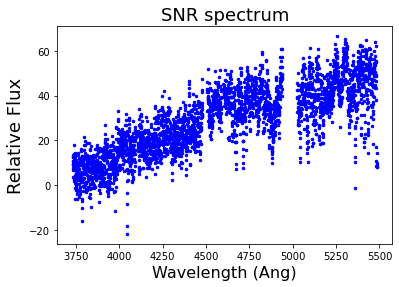

29.76757392351047

In [68]:
# excluding masked region
spec.cal_SNR(full_spec=False, doplot=True)

## Calculating statistical error could be done in varoius ways. One meaningful procedure could be the following. Generate around 500 realizations of the logarithimcally rebinned and normalized spectrum by adding Gaussian noise with spread equal to the RMS value of the residual which we get for the fit we are going to report. The spread of the velocity dispersion distribution from these 500 realizations would be the statistical error.

In [119]:
velocity_dispersion = []
#flux = spec.flux/np.median(spec.flux)
flux = spec.flux_rebinned
resid = spec.flux_rebinned[spec.mask_region] - spec.best_fit[0][spec.mask_region]
rms_resid = np.std(resid)

for i in range(500):
    
    #spec.flux_rebinned = add_noise_to_spectra()
    spec.flux_rebinned = flux + np.random.normal(0, rms_resid, size=len(spec.flux_rebinned))
    spec.cal_veldis(temp_spec=temp_spec, degree=[10, 11], mask_reg=mask_reg, show_weight=True, moments=2,
                   quiet=True, plot=False)
    
    velocity_dispersion.append(spec.vel_dis[0])


degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

In [121]:
print('std = %f' %np.std(velocity_dispersion))
print('mean = %f' %np.mean(velocity_dispersion))

std = 23.352583
mean = 168.859122


/home/pritom/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'velocity dispersion')

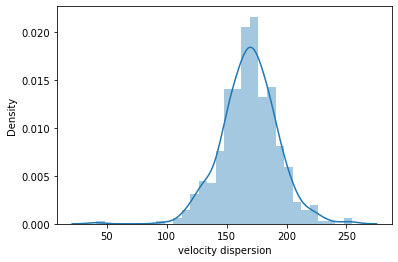

In [122]:
sn.distplot(velocity_dispersion)
plt.xlabel('velocity dispersion')


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -22048.222261 

sigma_diff : 0.721785

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       175       168
chi2/DOF: 3.577; degree = 8; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  9 / 100

'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -22048.222261 

sigma_diff : 1.286037

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       175       168
chi2/DOF: 3.577; degree = 8; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  9 / 100

'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -22048.222261 

sigma_diff : 1.7299

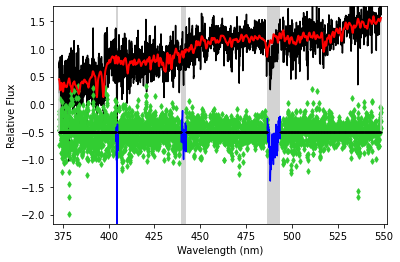

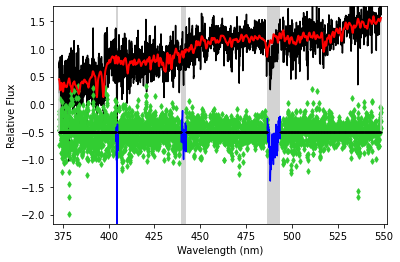

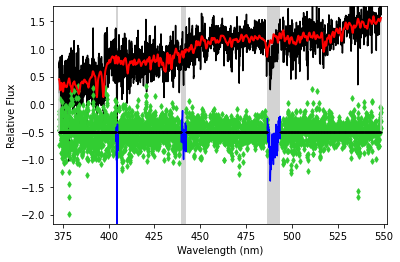

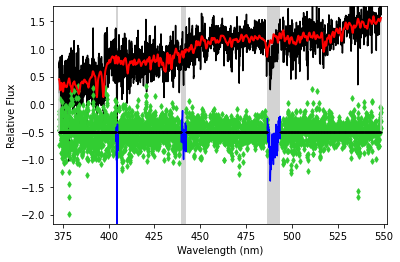

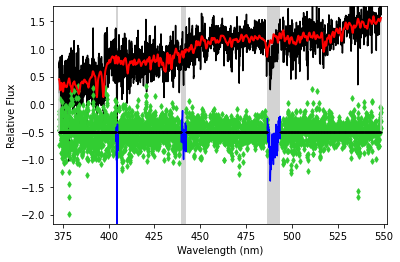

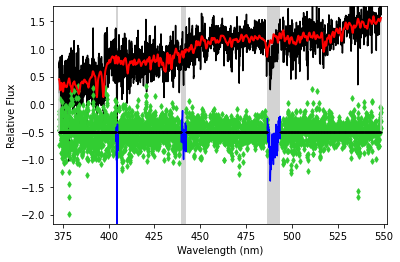

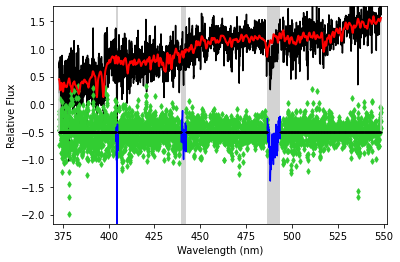

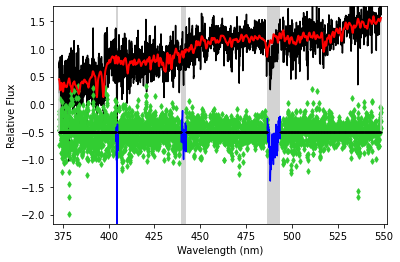

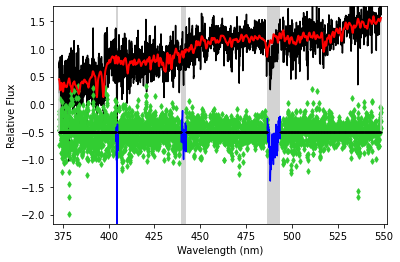

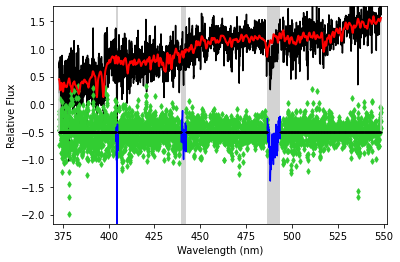

<Figure size 432x288 with 0 Axes>

In [9]:
sig_in = 1.0
velocity_dis = []
sigin = []
for i in range(10):
    temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=sig_in, temp_num=100)
    spec.cal_veldis(temp_spec=temp_spec, degree=[8, 9], mask_reg=mask_reg, show_weight=True, moments=2)
    sigin.append(sig_in)
    sig_in += 0.2
    velocity_dis.append(spec.vel_dis[0])

In [77]:
temp = []
for w in spec.temp_weight:
    temp.append(np.array(spec.templates)[w!=0])
temp_set =np.unique(np.hstack(temp))
temp_set

array(['../TEXT/107752.txt', '../TEXT/167006.txt', '../TEXT/18474.txt',
       '../TEXT/18778.txt', '../TEXT/195135.txt', '../TEXT/205512.txt',
       '../TEXT/215373.txt', '../TEXT/219134.txt', '../TEXT/223869.txt',
       '../TEXT/76644.txt', '../TEXT/G_103-68.txt'], dtype='<U22')

In [ ]:
np.unique(np.concatenate([temp_set1, temp_set]))
np.savetxt('templates_used.txt', temp_set1, fmt='%s')

In [76]:
tem = np.loadtxt('templates_used.txt', dtype=str)

66